<a href="https://colab.research.google.com/github/brkbyrktr/kruskal/blob/main/kruskal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
  def __init__(self, dugum_sayisi):
        self.V = dugum_sayisi
        self.graph = []
        self.edges = []
        self.parent = {}
        self.rank = {}

        for i in range(self.V):
            self.parent[i] = i
            self.rank[i] = 0

  def kenar_ekle(self, u, v, w):
    self.graph.append([u, v, w])
    self.edges.append((w, u, v))

  def kok_bul(self, i):
    if self.parent[i] == i:
        return i
    return self.kok_bul(self.parent[i])

  def birlestir(self, x, y):
    x_koku = self.kok_bul(x)
    y_koku = self.kok_bul(y)

    if self.rank[x_koku] < self.rank[y_koku]:
        self.parent[x_koku] = y_koku
    elif self.rank[x_koku] > self.rank[y_koku]:
        self.parent[y_koku] = x_koku
    else:
        self.parent[y_koku] = x_koku
        self.rank[x_koku] += 1

  def kruskal_mst(self):
    sonuc = []
    i = 0
    e = 0
    self.edges = sorted(self.edges)

    for kenar in self.edges:
        w, u, v = kenar
        u = ord(u) - 65
        v = ord(v) - 65
        x = self.kok_bul(u)
        y = self.kok_bul(v)

        if x != y:
            e += 1
            sonuc.append([u, v, w])
            self.birlestir(x, y)

        if e == self.V - 1:
            break
    min_yol=0
    for u, v, agirlik in sonuc:
        print("%c - %c: %d" % (chr(u + 65), chr(v + 65), agirlik))
        min_yol +=  agirlik


    # graf oluşturma
   
    G = nx.Graph()

    kenarlarim = []
    for kenarlar in self.edges:
      f, j, h = kenarlar
      kenarlarim.append([j, h, f])

    for h, j, k in kenarlarim:
      G.add_edge(h, j, weight=k)


    # ağacı oluşturma
    T = nx.minimum_spanning_tree(G)

    # düğüm etiketlerini belirleme
    dugum_etiketleri = {dugum:dugum for dugum in G.nodes()}
    kenar_etiketleri = {(h, j):k for (h, j, k) in G.edges(data='weight')}

    # düzenleme
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=500)
    nx.draw_networkx_edges(G, pos, width=2)
    nx.draw_networkx_edges(T, pos, width=3, edge_color='red')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=kenar_etiketleri, font_size=12)
    nx.draw_networkx_labels(G, pos, labels=dugum_etiketleri, font_size=12)


    # çizimi gösterme
    plt.axis('off')
    plt.show()
    print("Minimum yol uzunluk toplamı: ", min_yol)


E - G: 11
C - A: 12
A - B: 16
B - D: 17
E - D: 18
D - F: 19


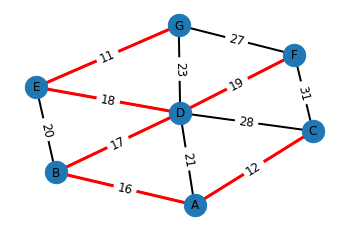

Minimum yol uzunluk toplamı:  93


In [15]:
g = Graph(15)
g.kenar_ekle('C', 'A', 12)
g.kenar_ekle('A', 'B', 16)
g.kenar_ekle('B', 'E', 20)
g.kenar_ekle('E', 'G', 11)
g.kenar_ekle('G', 'F', 27)
g.kenar_ekle('F', 'C', 31)
g.kenar_ekle('A', 'D', 21)
g.kenar_ekle('D', 'G', 23)
g.kenar_ekle('B', 'D', 17)
g.kenar_ekle('D', 'F', 19)
g.kenar_ekle('E', 'D', 18)
g.kenar_ekle('D', 'C', 28)

g.kruskal_mst()
